WRDS DATA WRANGLING HOMEWORK

To do this homework you need to know about PIVOT TABLE OPERATIONS in Pandas. If you do not know how to do this please read:
PivotTablesAll.pdf

NOTE: Best use Spyder to do this homework so you can look at the variables easily without having to print them all the time. But do not use capitalized letters for variable names in Spyder. If you use capitalized letters for names, 
Spyder will treat the names as though they stand for constants, not variables,
and you will not be able to see the contents in the variable browser.

In this couse we will be presenting a number of models that apply to stock portfolios.
So it is very important for you to understand how portfolio returns are calculated.
We take the opportunity to teach you not jut about portfolio returns but also about 
downloading and processing stock data from WRDS.
Access to WRDS is a privilege of great value.
Many companies hire summer students from uoft just to get access to WRDS through them 
(which is why uoft restricts student access to WRDS during the summer).
It is definitely in your interest to learn as much as possible about WRDS and to use it while you are a student.

WRDS DATABASE WE ARE GOING TO USE

We are going to work mainly with WRDS CRSP price database.
You can get 2 Years CRSP price data from 1/2/2018 to 12/31/2019 here:
https://wrds-web.wharton.upenn.edu/wrds/ds/crsp/stock_a/dsf.cfm?navId=128 
which is annually updated but includes nice things like that closing price bid and closing price ask...The bid-ask spread is a good input for machine learning.
At the bottom of this notebook we include a short list and descriptions of databases in WRDS that may be useful to you.

WHERE TO GET STOCK TICKER LISTS

The best place to get stock tickers of existing companies is in the holdings table of existing ETFS.
The largest ETF database is etfdb in: https://etfdb.com
Go there and search for US midcap stock ETFs. You will find large selection. We are going to select a US midcap stocks ETF called IJH, sold by ishares. We selected this particular ETF because the ishares website publishes the complete list of tickers in a useful format that we can copy and paste onto an Excel file. ishares ETFs are very liquid (have large volumes) and this makes them good choices for all purposes, including investment.
Go to the ishares IJH page: https://www.ishares.com/us/products/239763/ishares-core-sp-midcap-etf
go to the middle of the webpage and look for the holdings table.
Copy ALL the tickers (show all) onto an Excel spreadsheet and save it as a csv file, IJH.csv.
Now copy the column of tickers onto a notepad document and save it as a txt file, IJH.txt.

WHERE TO GET PRICES

In [1]:
#To get stock prices of daily frequency (annual update):
#GOTO: Home/Get Data/CRSP/Annual Update/Stock / Security Files/CRSP Daily Stock:
#https://wrds-web.wharton.upenn.edu/wrds/ds/crsp/stock_a/dsf.cfm?navId=128
#Step 1: Choose your date range (2 years): from 1/2/2018 to 12/31/2019
#Step 2: Apply your company codes:
#Select tickers, because our txt file contains tickers.
#Select an option for entering company codes:
#Select browse and select IJH.txt.
#Step 3: Query Variables:
#Select price.
#Select ticker.
#Step 4: Select query output.
#Select comma-delimited text (*.csv).
#Select MMDDYY10. (e.g. 07/25/1984).
#Press submit query.
#You should obtain a file with 4 columns PERMNO, date, TICKER, PRC.
#PRMNO is the identifier (because a company may change its ticker, though that happens seldom)
#Save your results in "IJH20182020.csv"

UNSTACK THE PRICES

In [2]:
#WRDS prices download in stacked format. For example you download from WRDS a matrix (=STACKED_PRICE):
#where the rows belong to non-distinct dates (the dates may repeat) and 
#where the columns are:
#PERMNO date TICKER PRICE
#where under the PERMNO column you have the distinct stock identifiers (e.g. 100, 101, ... 200), 
#under the date column you have the non-distinct dates and
#under the PRICE column you have the price relevant for that particular stock on that date
#The objective of unstacking is to obtain a matrix (UNSTACKED_PRICE) 
#where the rows are distinct dates (the dates may not repeat) and
#where the columns are the distinct PERMNO stock identifiers (or distinct TICKERS if you prefer):
#date 100 101 102 ... 200
#and under each under stock id. column header --100 101 102 ... 200-- we get 
#the price for that particular stock id on that distinct date
#To go from STACKED_PRICE to UNSTACKED_PRICE you must perform a PIVOT_TABLE operation.
#The output of the PIVOT_TABLE operation should be an UNSTACKED_PRICE matrix.
#Put this UNSTACKED_PRICE matrix into a dataframe.
#Call this dataframe UnstackedPrices
#Make the index be the date (which you should have first converted to datetime)
#Sort the index chronologically (having converted the dates to datetime previously)
#Make the column labels be the stock ids (either the PERMNOS or the TICKERS)
#Put the relevant absolute value of the price under each stock id
#Prices need to be set to their absolute value because:
#"If the closing price is not available for any given period, 
#the number in the price field (PRC) is replaced with a bid/ask average. 
#Bid/ask averages have dashes placed in front of them. 
#These do not incorrectly reflect negative prices; 
#they serve to distinguish bid/ask averages from actual closing prices. 
#If neither the price nor bid/ask average is available, the field is set to zero."

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
StackedPrices = pd.read_csv("IJH20182020.csv")
StackedPrices.head(2)

,PERMNO,date,TICKER,PRC
0,10200,01/02/2018,RGEN,37.06
1,10200,01/03/2018,RGEN,37.02


In [9]:
StackedPrices['date'] = pd.to_datetime(StackedPrices['date'])#convert to datetime
StackedPrices['PRC'] = np.abs(StackedPrices['PRC'])#take the absolute value
StackedPrices = StackedPrices.drop(columns=['TICKER'])
UnstackedPrices = pd.pivot_table(StackedPrices, values='PRC',index='date', columns=['PERMNO']) #unstack the prices with a pivot table operation
UnstackedPrices = UnstackedPrices.sort_index() #Sort the index
UnstackedPrices = UnstackedPrices.dropna(axis=1)
UnstackedPrices.head(5)

PERMNO,10200,10397,10517,10629,10693,10874,10932,11343,11369,11533,...,93101,93150,93174,93178,93179,93246,93330,93374,93419,93423
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,37.06,38.90,39.47,13.79,51.38,55.99,56.42,133.86000,34.85,153.39000,...,178.80000,49.93,50.95,37.89,30.18,48.03,102.05,55.86,33.91,66.84
2018-01-03,37.02,38.80,39.67,13.80,50.87,56.25,56.08,133.89000,34.85,153.42999,...,180.08000,50.45,51.17,37.43,29.71,49.73,101.10,56.62,34.17,65.53
2018-01-04,37.11,38.45,39.83,13.87,52.45,55.77,56.32,133.98000,34.75,155.17999,...,186.14999,51.04,51.46,37.28,29.47,50.07,102.70,57.55,33.28,65.08
2018-01-05,37.13,38.25,39.94,13.98,52.47,56.76,57.42,133.75000,34.80,156.92000,...,191.39000,51.16,51.53,37.32,29.43,50.41,103.65,58.77,33.46,65.70
2018-01-08,36.89,39.50,40.72,13.99,50.06,56.95,57.23,134.42999,35.05,158.86000,...,189.49001,50.86,51.90,37.86,30.20,49.53,103.40,60.39,33.87,66.02


CALCULATE THE RETURNS OF ALL THE STOCKS

In [4]:
#Calculate the returns of the stocks using the appropriate formula 
#by manipulating all columns of the UnstackedPrices dataframe simultaneously
#and save the returns to a different datafame called MidcapReturns.

In [10]:
MidCapReturns = MidCapReturns = (UnstackedPrices - UnstackedPrices.shift(1))/UnstackedPrices.shift(1) #calculate the individual stock returns 

CALCULATE THE PORTOLIO RETURNS

In [6]:
#Having calculated the stock returns, calculate the portfolio returns, assuming the formula provided below, 
#and assuming you are going to invest one dollar in each stock (assuming it is possible to buy a fraction of a stock).
#The portfolio returns should be a single column.
#Call this portfolio returns column "PortfolioReturns" and save it in the MidCapReturns dataframe.

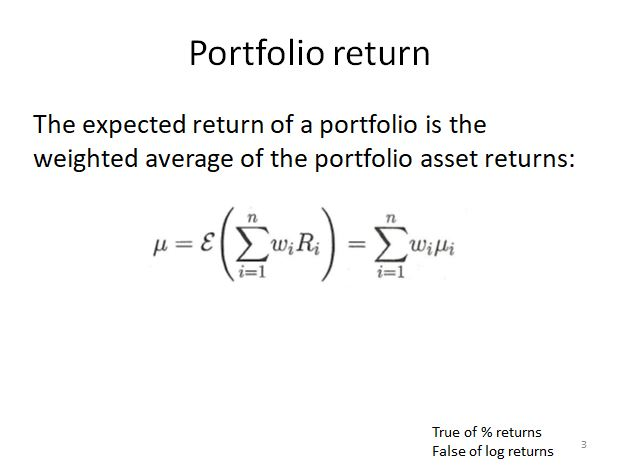

In [11]:
MidCapReturns['PortfolioReturns'] = MidCapReturns.mean(axis=1) #calculate the portfolio returns

CALCULATE THE CUMMULATIVE RETURNS

In [8]:
#calculate the cumulative returns of the column PortfolioReturns,
#save the cumulative returns in the MidcapReturns dataframe as a column called PortfolioCumReturns.

In [12]:
MidCapReturns['PortfolioCumReturns'] = np.cumprod(1+MidCapReturns['PortfolioReturns']) #calculate the cumulative portfolio returns

In [13]:
MidCapReturns.head()

PERMNO,10200,10397,10517,10629,10693,10874,10932,11343,11369,11533,...,93174,93178,93179,93246,93330,93374,93419,93423,PortfolioReturns,PortfolioCumReturns
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.001079,-0.002571,0.005067,0.000725,-0.009926,0.004644,-0.006026,0.000224,0.000000,0.000261,...,0.004318,-0.012140,-0.015573,0.035395,-0.009309,0.013605,0.007667,-0.019599,0.002992,1.002992
2018-01-04,0.002431,-0.009021,0.004033,0.005072,0.031060,-0.008533,0.004280,0.000672,-0.002869,0.011406,...,0.005667,-0.004007,-0.008078,0.006837,0.015826,0.016425,-0.026046,-0.006867,0.001837,1.004834
2018-01-05,0.000539,-0.005202,0.002762,0.007931,0.000381,0.017751,0.019531,-0.001717,0.001439,0.011213,...,0.001360,0.001073,-0.001357,0.006790,0.009250,0.021199,0.005409,0.009527,0.004129,1.008983
2018-01-08,-0.006464,0.032680,0.019529,0.000715,-0.045931,0.003347,-0.003309,0.005084,0.007184,0.012363,...,0.007180,0.014469,0.026164,-0.017457,-0.002412,0.027565,0.012253,0.004871,0.002091,1.011092


COMPARE THESE COMULATIVE RETURNS TO THE CUMULATIVE RETURNS OF THE IJH ETF

In [10]:
#Download the IJH ETF historical DAILY price from Yahoo finance from 1/2/2018 to 12/31/2019
#https://ca.finance.yahoo.com/quote/IJH/history?p=IJH
#and save them to a dataframe called IJH.
#Calculate the percent returns of these IJH Close (not the Adjusted Close) prices and 
#save them in the IJH dataframe under the heading IJHReturns.
#Calculate the cumulative returns of the IJHReturns and 
#save them in the IJH dataframe under the heading IJHCumReturns.
#Declare a new dataframe called Comparison and
#Put the IJHCumReturns and PortfolioCumReturns as two columns in this dataframe 
#(they should have the same length, if they do not, do your best to make them pair up)
#and plot them together using Pandas.
#Are they exactly similar? what could account for any difference between the two if any?

**The IJH ETF data was downloaded from Yfinance**

In [14]:
import yfinance as yf
yf.pdr_override()

In [15]:
IJH = yf.download('IJH', 
                      start='2018-01-01', 
                      end='2020-01-01', 
                      progress=False)
IJH.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,190.479996,191.570007,190.050003,191.570007,182.376877,2937700
2018-01-03,191.580002,192.250000,191.279999,191.919998,182.710052,1337500
2018-01-04,192.770004,193.229996,192.440002,192.470001,183.233688,1186500
2018-01-05,193.029999,193.360001,192.509995,193.220001,183.947708,1222300
2018-01-08,193.199997,194.389999,192.539993,194.179993,184.861633,1059700


In [20]:
# process actual IJH ETF price data for comparison
# Ijh = pd.read_csv("IJH.csv"...)
# IJH['datetime'] = #convert to datetime
# IJH.index = #set index to datetime
#sort the index

#Calculate the IJH ETF Close percent returns:
IJH['IjhReturns'] = (IJH['Close']-IJH['Close'].shift(1))/IJH['Close'].shift(1)

#Calculate the IJH ETF Close cumulative returns:
IJH['IjhCumReturns'] = np.cumprod(1+IJH['IjhReturns'])

#Plot the cumulative returns of the IJH ETF versus the cumulative returns of the equally weighted portfolio of IJH member stocks:
#Declare a new dataframe called Comparison and
#Put the IJHCumReturns and PortfolioCumReturns as two columns in this dataframe 
#(they should have the same length, if they do not, do your best to make them pair up)
#and plot them together using Pandas.

comparison = pd.concat([IJH['IjhCumReturns'], MidCapReturns['PortfolioCumReturns']], axis=1, keys=['IjhCumReturns', 'PortfolioCumReturns'])

#Explain the difference if there is one

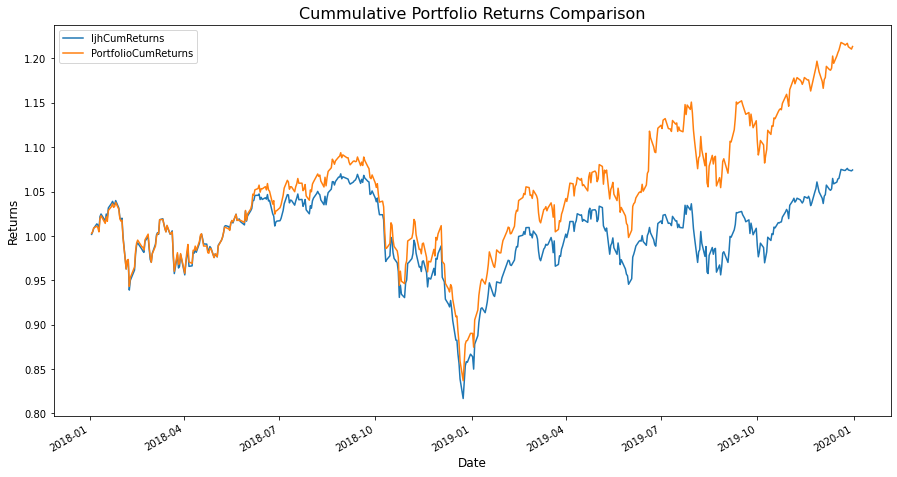

In [23]:
plt.figure(figsize=(15,8))
comparison['IjhCumReturns'].plot()
comparison['PortfolioCumReturns'].plot()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Returns', fontsize=12)
plt.title('Cummulative Portfolio Returns Comparison', fontsize=16)
plt.legend()
plt.show()

**There is a slight difference in the cummulative returns of the data taken from WRDS and yfinance as we had to drop few columns (permno) due to the presence of nan's in those permnos**

**There is another possibility that the assets were weighted differently.**

USEFUL DATABASES IN WRDS

You can get CRSP price data from 2007 to last Dec  here:
https://wrds-web.wharton.upenn.edu/wrds/ds/crsp/stock_a/dsf.cfm?navId=128 
which is annually updated but includes nice things like that closing price bid and closing price ask...The bid-ask spread is a good input for machine learning.

Compustat price data from 2010 to now here:
https://wrds-web.wharton.upenn.edu/wrds/ds/compd/secd/index.cfm?navId=83 
Does not inlcude the closing price bid and the closing price ask, but the data is up to date, which is nice.

Home/Get Data/CRSP/Annual Update/CRSP/Compustat Merged has both price and fundamental data in the same table (quite convenient)
https://wrds-web.wharton.upenn.edu/wrds/query_forms/navigation.cfm?navId=120

Fundamental data (financial ratios)
Compustat fundamental data calculated quarterly from 2010 to 2020 is here:
https://wrds-web.wharton.upenn.edu/wrds/ds/compd/fundq/index.cfm?navId=83 

IBES fundamental monthly data from 2011 to now is here:
https://wrds-web.wharton.upenn.edu/wrds/ds/ibes/statsum/index.cfm?navId=234
If you want to work with ratios and fundamental data, better work with this database and the Financial Ratio data (below) because the frequency is monthly.

Financial Ratio data, calculated monthly from 2010 to now here:
https://wrds-web.wharton.upenn.edu/wrds/ds/wrdsapps/finratiofirm/index.cfm?navId=476&_ga=2.82981846.1955975439.1591382539-123730921.1590599130 

For industry information:
https://wrds-www.wharton.upenn.edu/documents/918/GICS_Codes.pdf

For share code information:
https://wrds-web.wharton.upenn.edu/wrds/query_forms/variable_documentation.cfm?vendorCode=CRSP&libraryCode=crspa&fileCode=dsf&id=shrcd